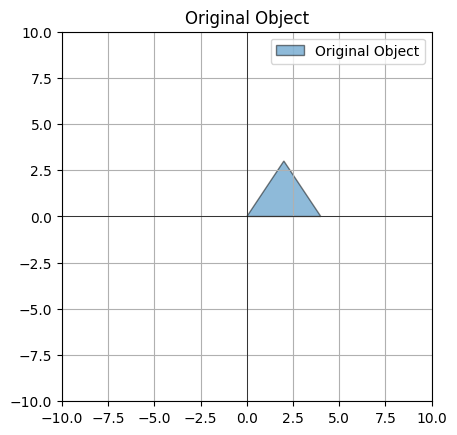

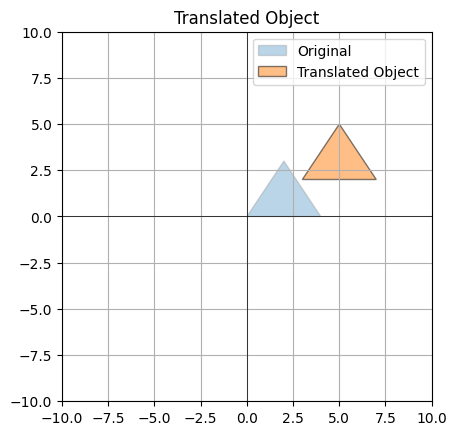

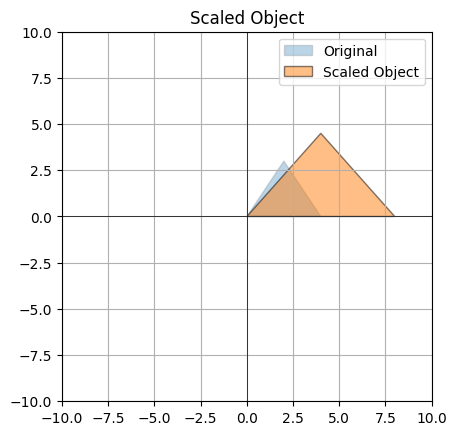

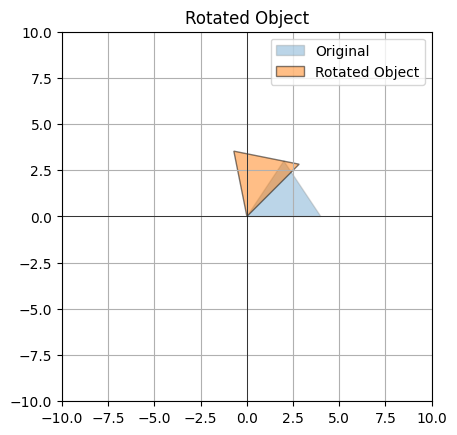

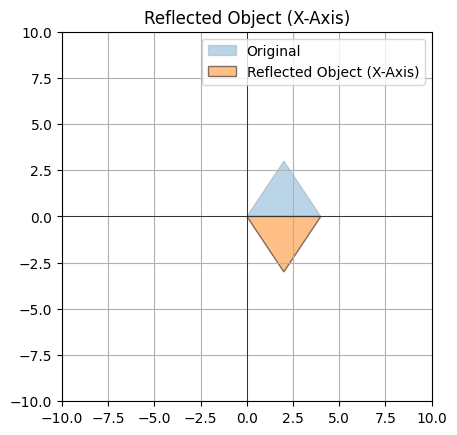

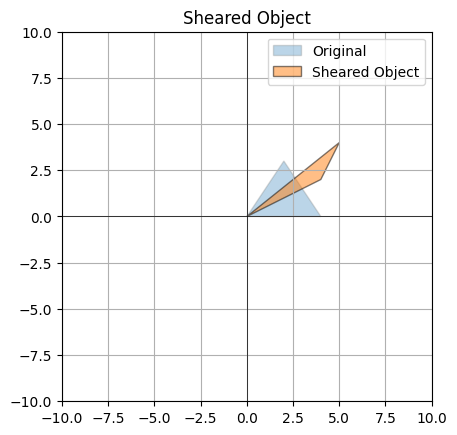

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_object(points, title, original_points=None):
    plt.figure()
    if original_points is not None:
        plt.fill(original_points[:, 0], original_points[:, 1], edgecolor='gray', alpha=0.3, label='Original')
    plt.fill(points[:, 0], points[:, 1], edgecolor='black', alpha=0.5, label=title)
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

def translate(points, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(points, translation_matrix)

def scale(points, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, scaling_matrix)


    return apply_transformation(points, scaling_matrix)


def rotate(points, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, rotation_matrix)

def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'origin'.")
    return apply_transformation(points, reflection_matrix)

def shear(points, shx, shy):
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, shearing_matrix)

def apply_transformation(points, matrix):
    ones = np.ones((points.shape[0], 1))
    homogeneous_points = np.hstack([points, ones])
    transformed_points = homogeneous_points @ matrix.T
    return transformed_points[:, :2]

# Define the initial 2D object (e.g., a triangle)
original_points = np.array([
    [0, 0],
    [4, 0],
    [2, 3],
    [0, 0]  # Closing the shape
])

# Plot the original object
plot_object(original_points, "Original Object")

# Translation
translated_points = translate(original_points, 3, 2)
plot_object(translated_points, "Translated Object", original_points)

# Scaling
scaled_points = scale(original_points, 2, 1.5)
plot_object(scaled_points, "Scaled Object", original_points)

# Rotation
rotated_points = rotate(original_points, 45)
plot_object(rotated_points, "Rotated Object", original_points)

# Reflection
reflected_points = reflect(original_points, 'x')
plot_object(reflected_points, "Reflected Object (X-Axis)", original_points)

# Shearing
sheared_points = shear(original_points, 1, 0.5)
plot_object(sheared_points, "Sheared Object", original_points)

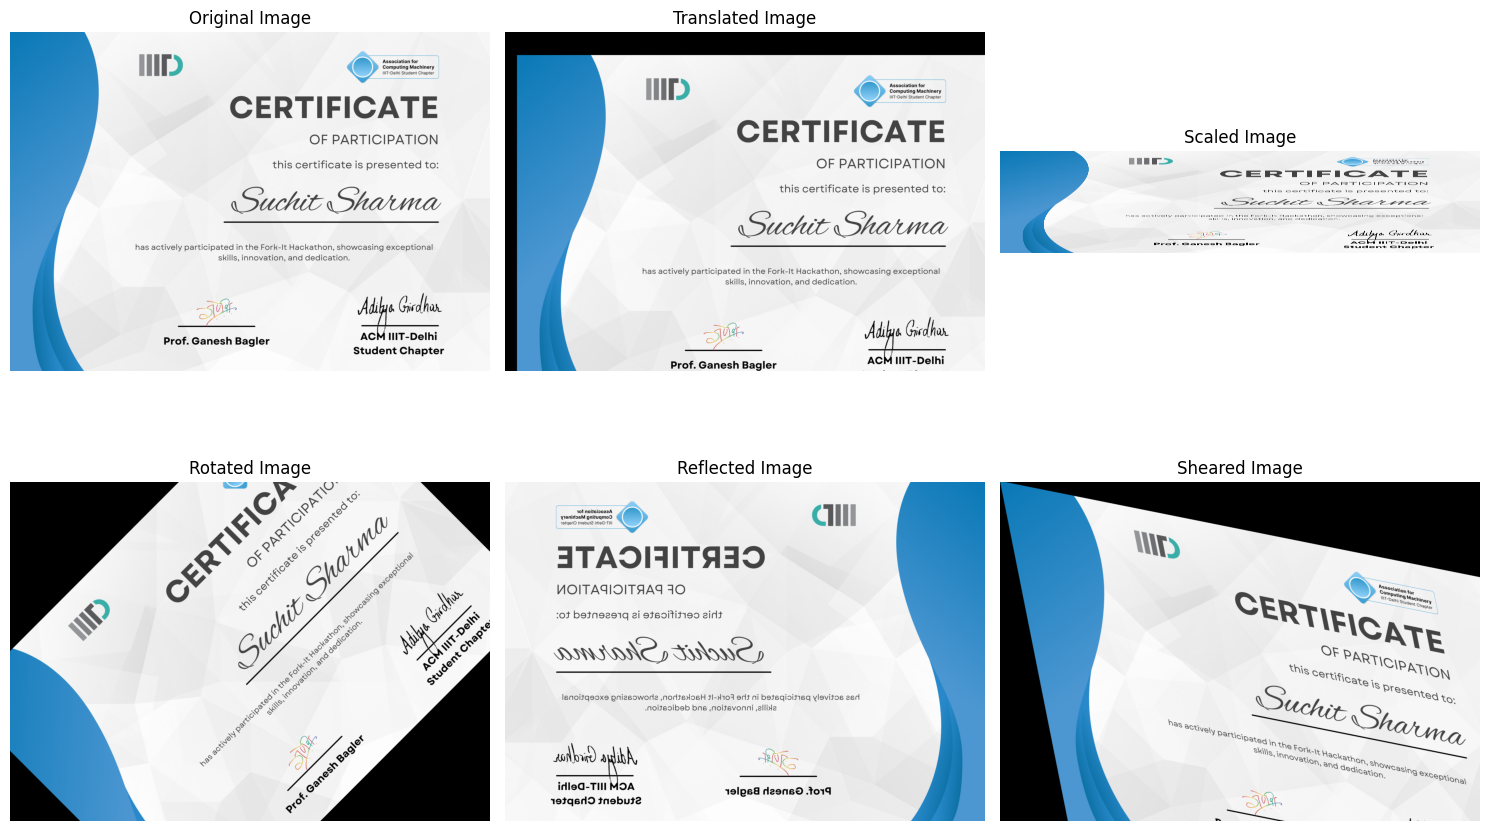

In [ ]:
from google.colab.patches import cv2_imshow  # Correct import
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/IIITD.png"
image = cv2.imread(image_path)

# 1. Translation using cv2.warpAffine
def translate(image, tx, ty):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (cols, rows))

# 2. Scaling using cv2.resize
def scale(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# 3. Rotation using cv2.getRotationMatrix2D and cv2.warpAffine
def rotate(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

# 4. Reflection using cv2.flip
def reflect(image, direction='horizontal'):
    if direction == 'horizontal':
        return cv2.flip(image, 1)
    elif direction == 'vertical':
        return cv2.flip(image, 0)

# 5. Shearing using cv2.warpAffine (using shear matrix)
def shear(image, shear_x, shear_y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    return cv2.warpAffine(image, M, (cols, rows))


# Apply transformations
translated_image = translate(image, 50, 100)  # Translate by 50px in x and 100px in y
scaled_image = scale(image, 10, 3)  # Scale by 1.5x in both x and y
rotated_image = rotate(image, 45)  # Rotate by 45 degrees
reflected_image = reflect(image, 'horizontal')  # Reflect horizontally
sheared_image = shear(image, 0.2, 0.2)  # Shear by 0.2 in both x and y


# Plot images in a grid using matplotlib
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Translated Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('Scaled Image')
axs[0, 2].axis('off')

axs[1, 0].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Rotated Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(reflected_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Reflected Image')
axs[1, 1].axis('off')

axs[1, 2].imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title('Sheared Image')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
